## TBA

**Recommended background:**  experiment `1D/reaction_diffusion/transient_getting_mopped_up`

### TAGS : "reactions 1D", "diffusion 1D", "membranes 1D"

In [1]:
LAST_REVISED = "Aug. 13, 2025"
LIFE123_VERSION = "1.0.0rc5"       # Library version this experiment is based on

In [2]:
#import set_path              # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from life123 import BioSim1D, ChemData, Reactions, check_version

In [4]:
check_version(LIFE123_VERSION)

OK


### Initialize the Chemical Data and the Reactions

In [5]:
# Initialize the chemical data
chem_data = ChemData(names=["A", "B", "C"], diffusion_rates=[100., 80., 120.],  
                     plot_colors=["red", "turquoise", "green"]) 

rxns = Reactions(chem_data=chem_data)

# Reaction A + B <-> C , with 1st-order kinetics for each species; note that it's mostly in the forward direction
rxns.add_reaction(reactants=["A", "B"], products="C", forward_rate=0.1, reverse_rate=0.02)
rxns.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 0.1 / kR = 0.02 / delta_G = -3,989.7 / K = 5) | 1st order in all reactants & products
Chemicals involved in the above reactions: {"A" (red), "B" (turquoise), "C" (green)}


### Initialize the 1D System, including Membranes

In [6]:
bio = BioSim1D(n_bins=50, chem_data=chem_data, reactions=rxns)

In [7]:
bio.membranes().set_membranes(membranes=[ (2, 18) ])

In [8]:
bio.membranes().membrane_list

[(2, 18)]

In [9]:
# We'll use 1/2 of the diffusion rate of `A` and `B` 
# as their respective membrane permeability (by passive transport)
# `C`, by constrast, keep the default 0 permeability (i.e., can't cross membranes)
bio.membranes().change_permeability("A", 50.)
bio.membranes().change_permeability("B", 40.)

### Initialize the initial concentrations

In [10]:
# Set up the initial bell-shape concentration of `A`, with the very narrow peak close to one end of the system,
# centered at 1/10 of the width of the system, i.e. at bin 30
bio.inject_bell_curve(chem_label="A", center=0.2, sd=0.05, max_amplitude=100., bias=0., clip=(2,17))

In [11]:
# Chemical `B`, by contrast, is uniformly distributed
bio.set_uniform_concentration(chem_label="B", conc=100.)

In [12]:
df = bio.describe_state()
df

SYSTEM STATE at Time t = 0:
50 bins and 3 chemical species
Membranes present:  [(2, 18)]


,Species,Diff rate,Bin 0,Bin 1,Bin 2,Bin 3,Bin 4,Bin 5,Bin 6,Bin 7,...,Bin 40,Bin 41,Bin 42,Bin 43,Bin 44,Bin 45,Bin 46,Bin 47,Bin 48,Bin 49
0,A,100.0,0.0,0.0,0.62957,2.124299,6.06785,14.672425,30.034239,52.045012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,80.0,100.0,100.0,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,C,120.0,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df[df.columns[2:22]]  # Zoom in where the action is

,Bin 0,Bin 1,Bin 2,Bin 3,Bin 4,Bin 5,Bin 6,Bin 7,Bin 8,Bin 9,Bin 10,Bin 11,Bin 12,Bin 13,Bin 14,Bin 15,Bin 16,Bin 17,Bin 18,Bin 19
0,0.0,0.0,0.62957,2.124299,6.06785,14.672425,30.034239,52.045012,76.346534,94.8085,99.66736,88.696477,66.82016,42.614402,23.00663,10.514711,4.068079,1.332383,0.0,0.0
1,100.0,100.0,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0000,100.00000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.0
2,0.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0


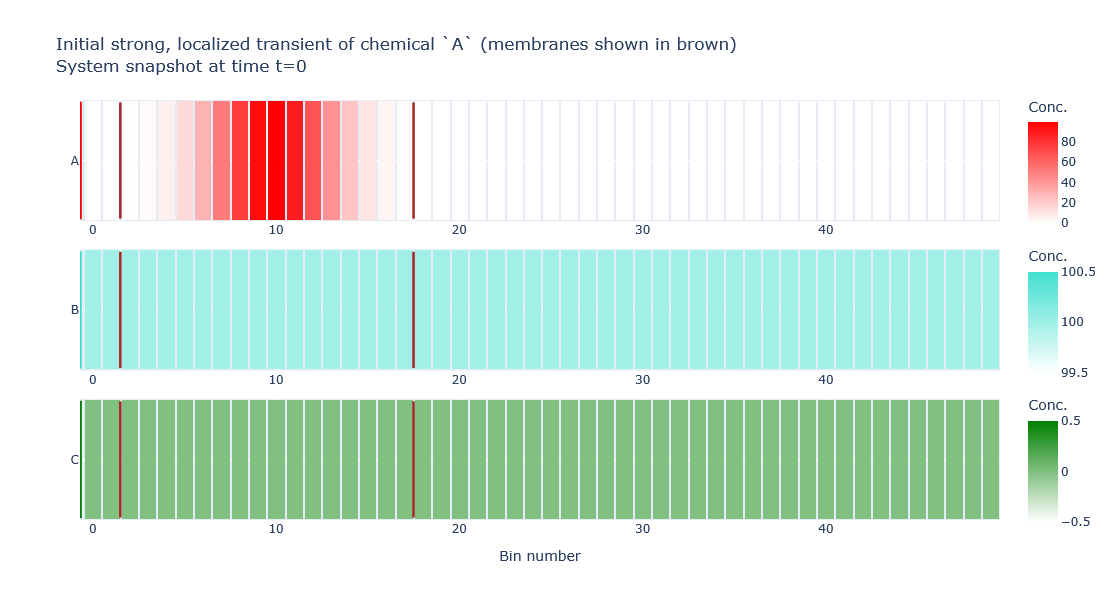

In [18]:
# Show as heatmap (including the membranes, shown in brown)
bio.system_heatmaps(title_prefix="Initial strong, localized transient of chemical `A` (membranes shown in brown)")

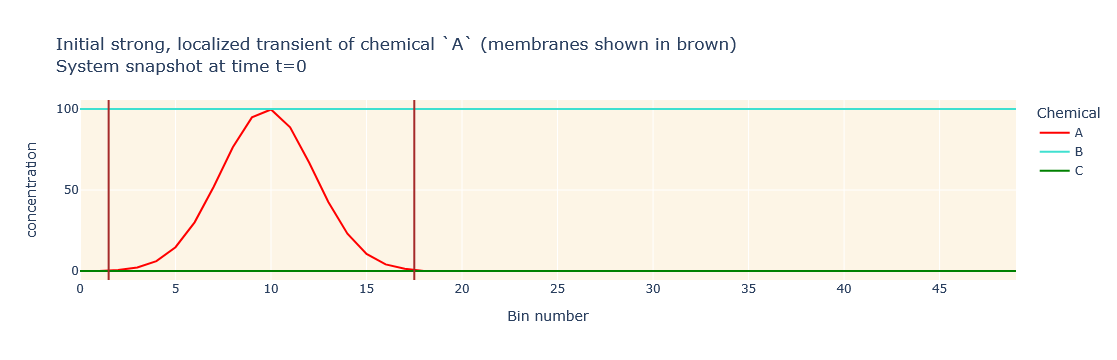

In [17]:
# Visualize the system state so far
bio.visualize_system(title_prefix="Initial strong, localized transient of chemical `A` (membranes shown in brown)")

### The initial transient of `A` is localized within the compartment (organelle) between bins 2 and 18

## Request history-keeping for some bins

In [14]:
# Request to save the concentration history at the bins with the initial concentration injection, 
# and the bins at, or near, both ends of the system
bio.enable_history(bins=[0, 10, 20, 49], frequency=15, take_snapshot=True)    

History enabled for bins [0, 10, 20, 49], for ALL chemicals


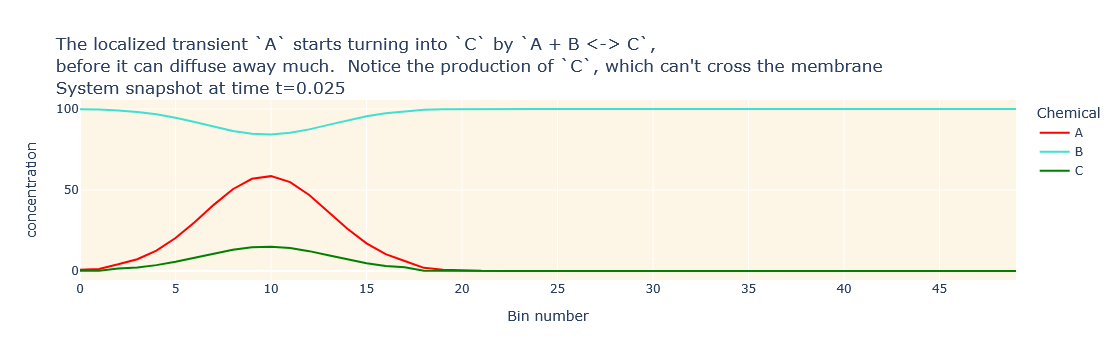

In [17]:
# The first round of REACTION-diffusion, over a small time duration
bio.react_diffuse(total_duration=0.025, time_step=0.001)
bio.visualize_system(title_prefix=["The localized transient `A` starts turning into `C` by `A + B <-> C`, ",
                                   "before it can diffuse away much.  Notice the production of `C`, which can't cross the membrane"])

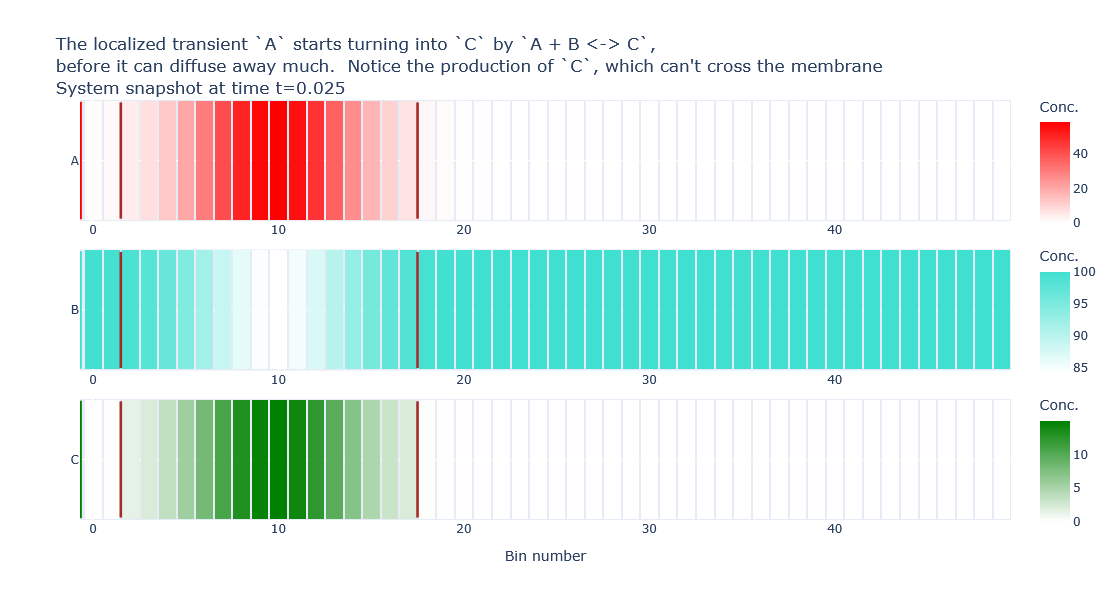

In [18]:
# SAME IN HEATMAP VIEW
bio.system_heatmaps(title_prefix=["The localized transient `A` starts turning into `C` by `A + B <-> C`, ",
                                  "before it can diffuse away much.  Notice the production of `C`, which can't cross the membrane"])

### Let's continue the reaction-diffusion

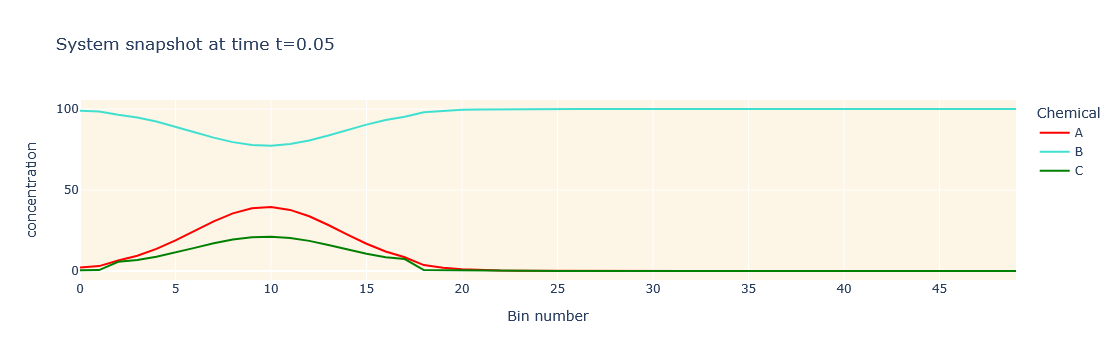

In [19]:
bio.react_diffuse(total_duration=0.025, time_step=0.001)
bio.visualize_system()

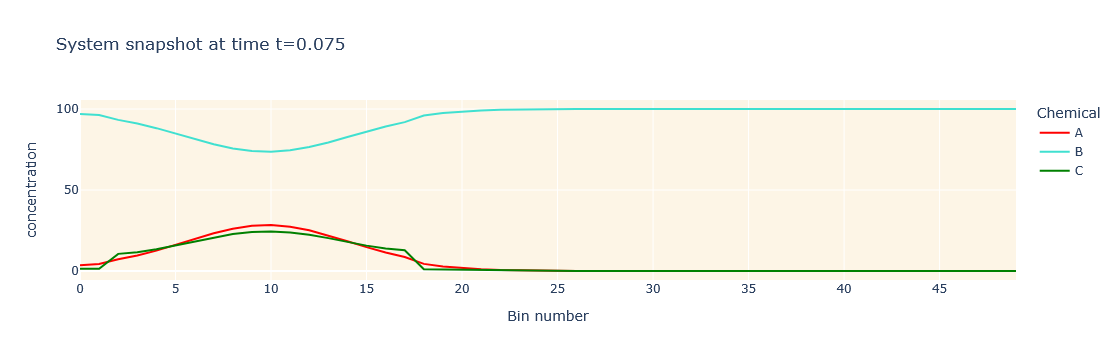

In [20]:
bio.react_diffuse(total_duration=0.025, time_step=0.001)
bio.visualize_system()

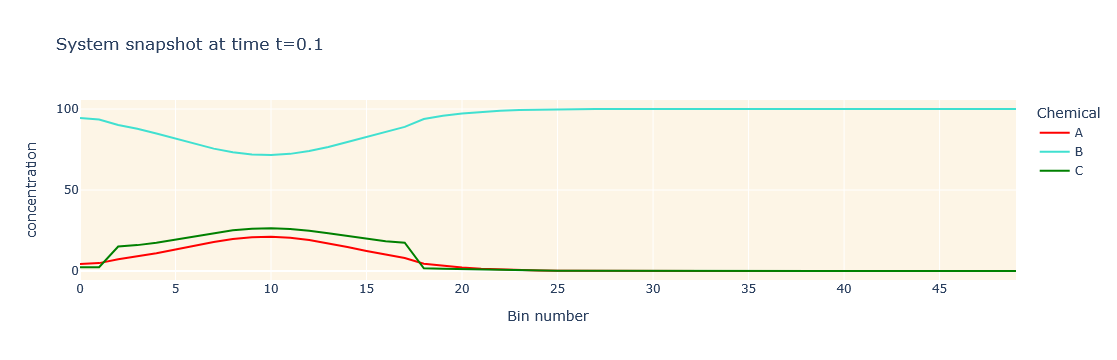

In [21]:
bio.react_diffuse(total_duration=0.025, time_step=0.001)
bio.visualize_system()

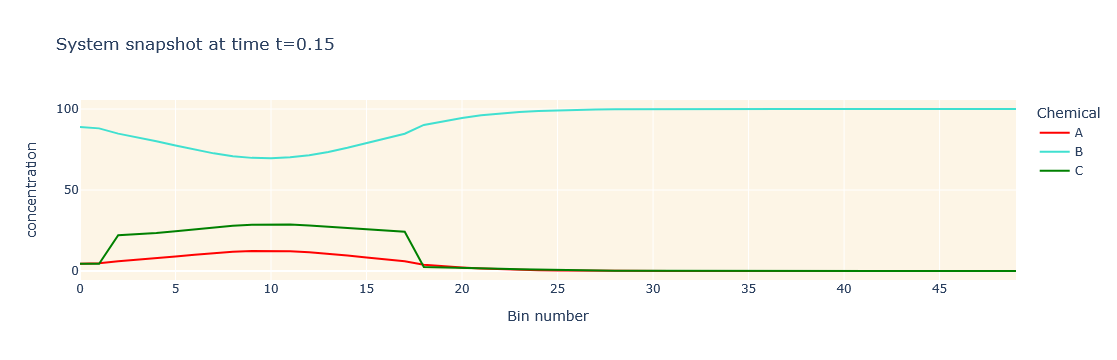

In [22]:
bio.react_diffuse(total_duration=0.05, time_step=0.002)
bio.visualize_system()

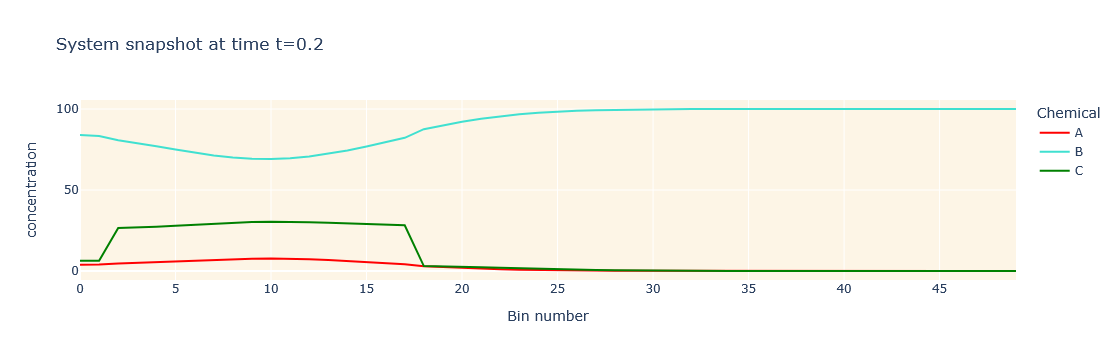

In [23]:
bio.react_diffuse(total_duration=0.05, time_step=0.002)
bio.visualize_system()

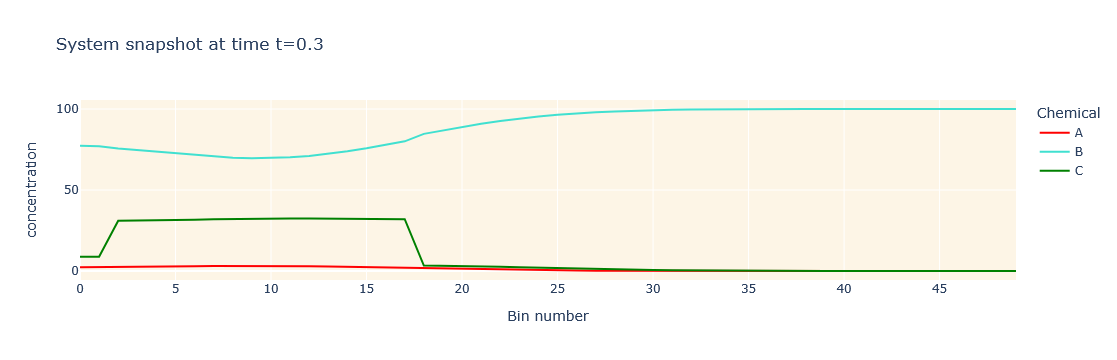

In [24]:
bio.react_diffuse(total_duration=0.1, time_step=0.0025)
bio.visualize_system()

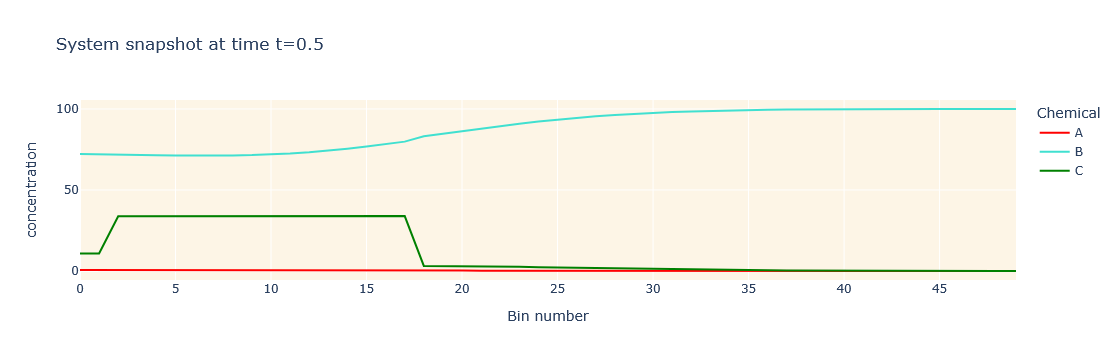

In [25]:
bio.react_diffuse(total_duration=0.2, time_step=0.0025)
bio.visualize_system()

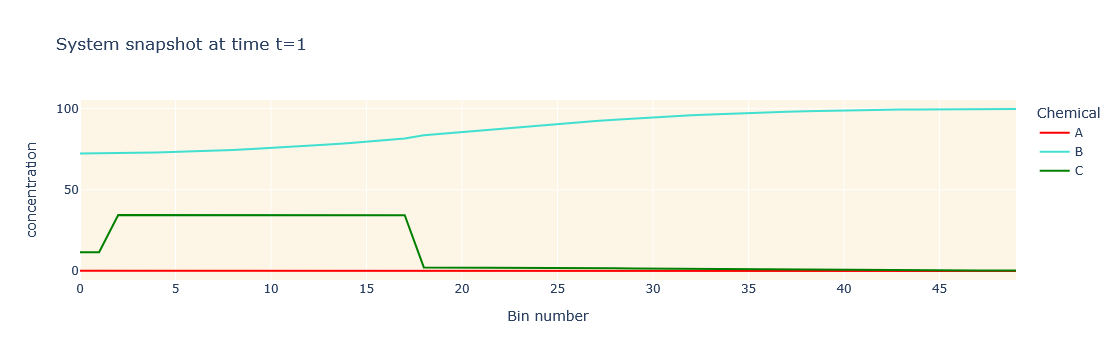

In [26]:
bio.react_diffuse(total_duration=0.5, time_step=0.0025)
bio.visualize_system()

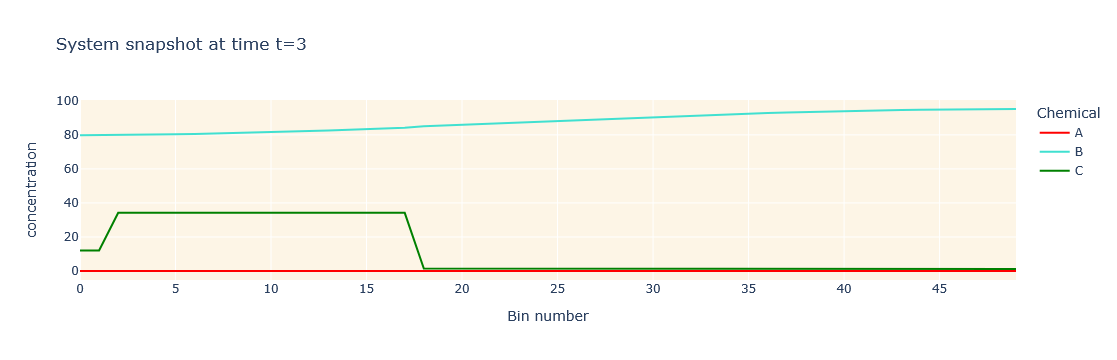

In [27]:
bio.react_diffuse(total_duration=2, time_step=0.0025)
bio.visualize_system()

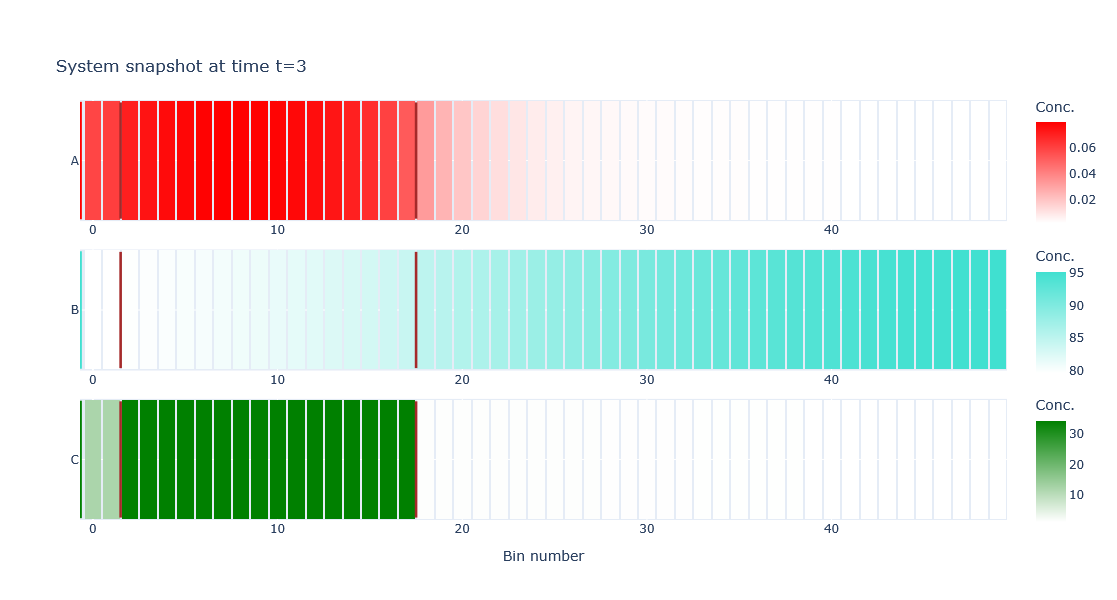

In [28]:
bio.system_heatmaps()

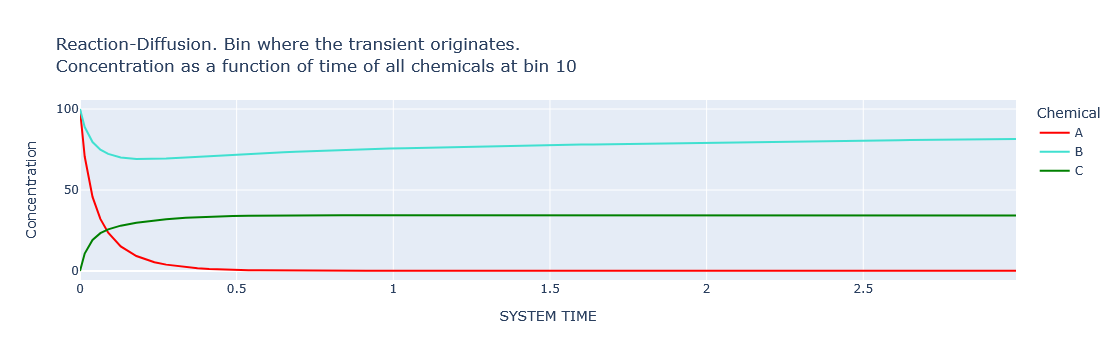

In [29]:
bio.plot_history_single_bin(title_prefix="Reaction-Diffusion. Bin where the transient originates.", 
                             bin_address=10)

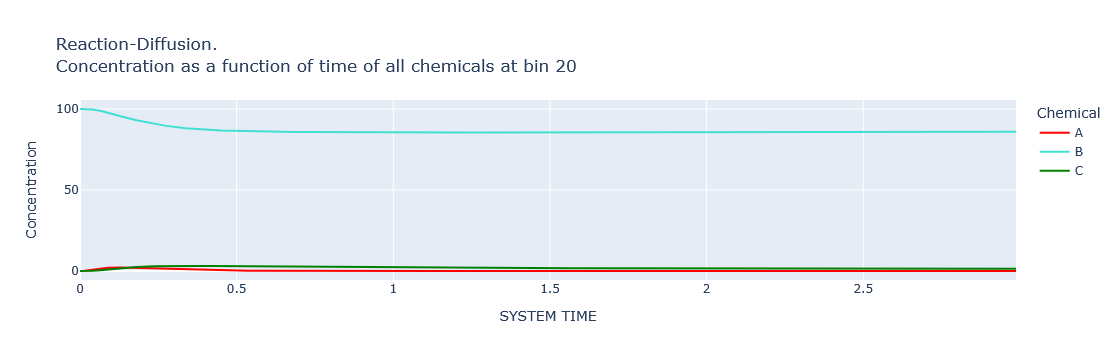

In [30]:
bio.plot_history_single_bin(title_prefix="Reaction-Diffusion.", bin_address=20)

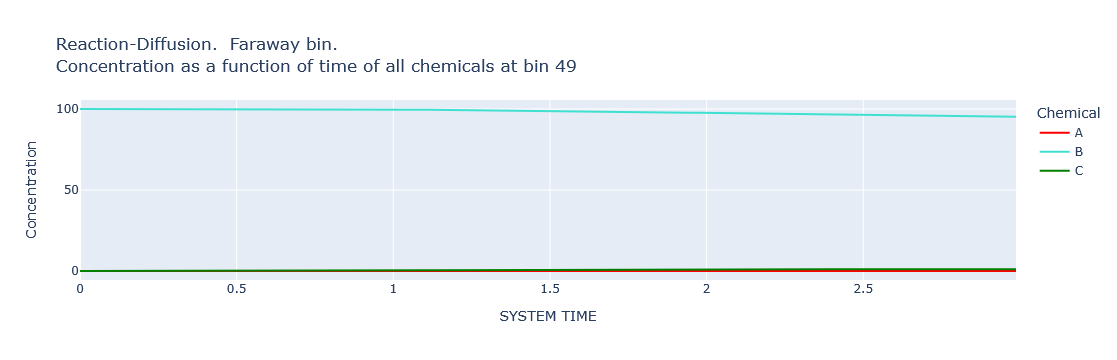

In [31]:
bio.plot_history_single_bin(title_prefix="Reaction-Diffusion.  Faraway bin.", 
                             bin_address=49)

## Virtually no `A` ever reaches the faraway bins!